In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [95]:
import numpy as np

from collections import OrderedDict
from statsmodels.nonparametric.kde import KDEUnivariate

from lint.models import Token

def token_density(token, bw=2, corpus=None):
    
    # Get the raw token series.
    series = Token.token_series(token, corpus)
    
    # Use the raw counts as weights.
    weights = np.array(list(series.values()), dtype=float)

    # Estimate density.
    density = KDEUnivariate(list(series.keys()))
    density.fit(weights=weights, bw=bw, fft=False)
    
    return density

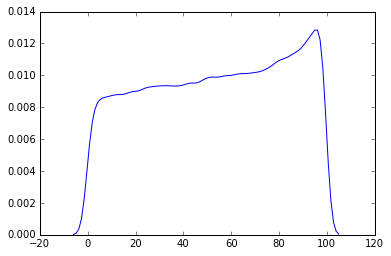

In [99]:
density = token_density('god')
plt.plot(density.support, density.density)
plt.show()